In [3]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

#4.1 선형회귀

##4.1.1 정규방정식

In [5]:
import numpy as np

X = 2*np.random.rand(100,1) # [0, 1) 범위의 [100,1] 2D array
y = 4+3*X+np.random.randn(100,1)

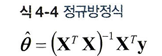

In [6]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best # 4와 3을 기대

array([[4.04288161],
       [2.89352473]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘픙에 x0 = 1을 추가합니다.

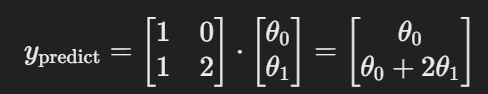

In [9]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04288161],
       [9.82993107]])

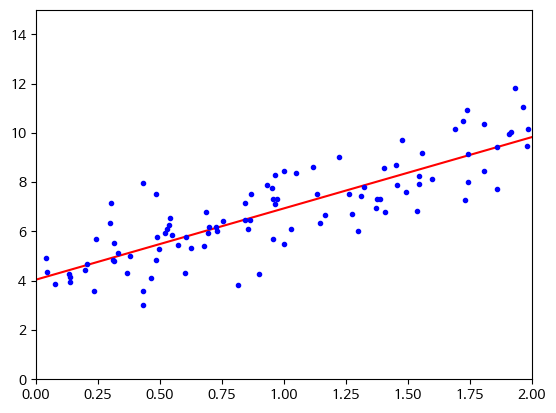

In [10]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

plt.show()

사이킷런에서 선형 회귀를 수행하는 방법

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04288161]), array([[2.89352473]]))

In [12]:
lin_reg.predict(X_new)

array([[4.04288161],
       [9.82993107]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.04288161],
       [2.89352473]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.04288161],
       [2.89352473]])

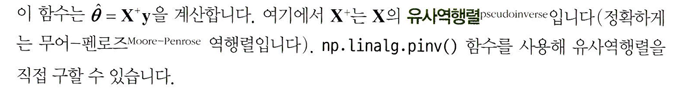

# 4.2 경사 하강법

- 짙은 안개로 산속에서 길을 잃은 상황에서 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것임
- 파라미터 벡터 theta에 대해 비용함수의 현재 gradient를 계산하고 gradient가 감소하는 방향으로 진행한다. gradient가 0이 되면 최솟값에 도달한 것임! **gradient=기울기**



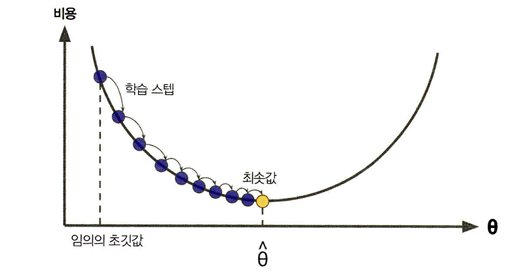

- 중요한 파라미터는 스텝의 크기로, 학습률(learning rate)하이퍼파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.반면 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모름

- 경사 하강법의 문제점은 모든 비용함수가 매끈한 그롯과 같지는 않다. 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵. 따라서 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴하거나 일찍 멈추어 전역 최솟값에 도달하지 못하는 문제점이 생긴다.

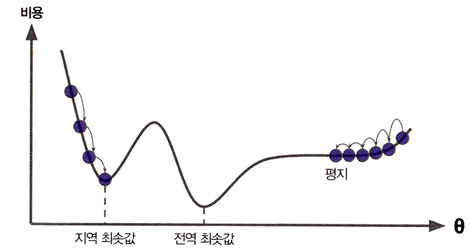

- 다행히 선형 회귀를 통한 MSE비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수이다. 이 사실은 경사 하강법이 전역 최솟값에 가깝게 접근할수 있다는 것을 보장한다.

##4.2.1 배치 경사 하강법

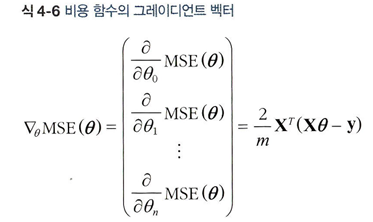

In [15]:
import numpy as np

eta = 0.1 # 학습률
n_iterations = 1000
m = 100

np.random.seed(42)
theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [16]:
theta

array([[4.04288161],
       [2.89352473]])

##4.2.2 확률적 경사 하강법

- 배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 gradient를 계산하므로 훈련 세트가 커지면 매우 느려짐. 반대로 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 gradient를 계산하므로 빠르다.
- 하지만 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정하고, 비용함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소
- **비용 함수가 매우 불규칙할 경우** 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.
- **학습률을 크게 시작했다가 점차 작게 줄여**서 지역 최솟값에서 탈출시키지만 전역 최솟값에 다다르지 못하게 한다는 딜레마를 해소한다.

In [17]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t) : # 학습률을 점진적으로 줄이기 위함
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs) : # 전체 데이터셋을 n_epochs번 반복 학습
  for i in range(m) :  # 한 에포크에서 m개의 샘플을 모두 사용
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi =   y[random_index : random_index + 1]

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

일반적으로 한 반복(에포크)에서 m번 되풀이된다. 즉 하나의 샘플에 대한 gradient를 계산.

배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달함

In [18]:
theta

array([[4.05577394],
       [2.84959698]])

In [19]:
# 사이킷런에서 SGD(확률적 경사 하강법) 방식으로 회귀 사용

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 100, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=100, penalty=None, random_state=42)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.00378885]), array([2.86703519]))

# 4.3 다항 회귀

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
np.random.seed(42) # 매 실행마다 동일한 난수 생성하도록 고정

In [23]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) # 2차방정식으로 비선형 데이터

In [24]:
# 훈련 데이터 변환 - 훈련 세트에 있는 각 특성을 제곱하여 새로운 특정으로 추가

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False) # include_bias의 기본값은 True이 편향을 위한 특성인 1이 추가
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [25]:
X_poly[0] # X_poly는 이제 원래 특성 X와 이 특성의 제곱을 포함

array([-0.75275929,  0.56664654])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# 4.4 학습 곡선

- 고차 다항 회귀를 적용하면 보통의 선형 회귀보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다. 선형이나 2차보다 300차의 예시를 보면 안다.
- 하지만 이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되었고, 선형 모델은 과소적합되었다.
- 얼마나 복잡한 모델을 사용할지 어떻게 결정하며, 어떻게 모델이 과대적합 또는 과소적합되었는지 알 수 있을까?

**학습 곡선**을 살펴보는 것이다.

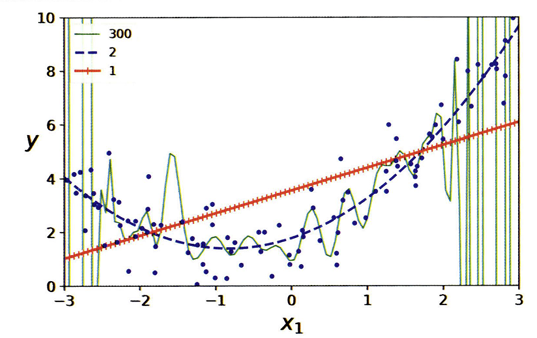

In [27]:
# 이 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y) :
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)) :
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict (X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "검증 세트")

  plt.legend(loc = "upper right", fontsize = 14) # 라벨 추가

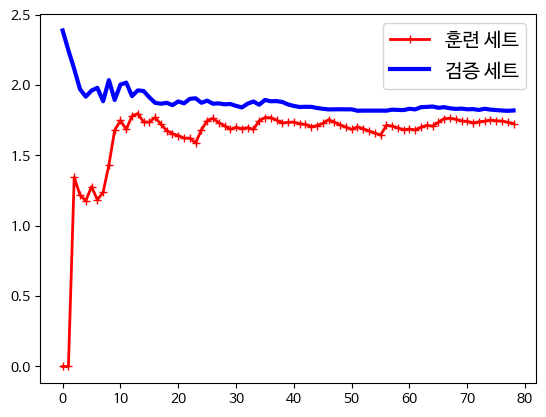

In [28]:
# 단순 선형 회귀 모델의 학습 곡선 살펴보기 - 평균 오차가 어느시점부터 계속 상승하다가 거의 변화 x

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

이 학습 곡선은 과소적합 모델의 전형적인 모습임. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해있다.

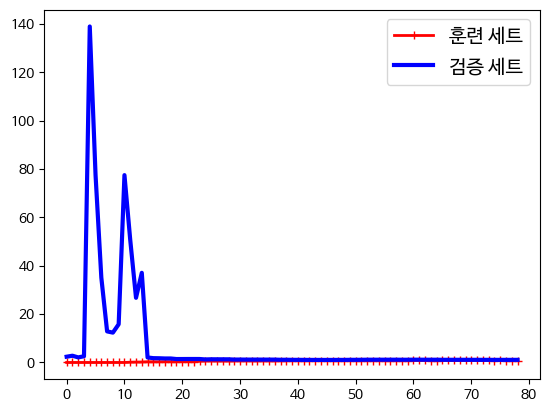

In [29]:
# 같은 데이터에서 10차 다항 회귀의 학습 곡선을 그려보자
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree = 10, include_bias = False))
                                , ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

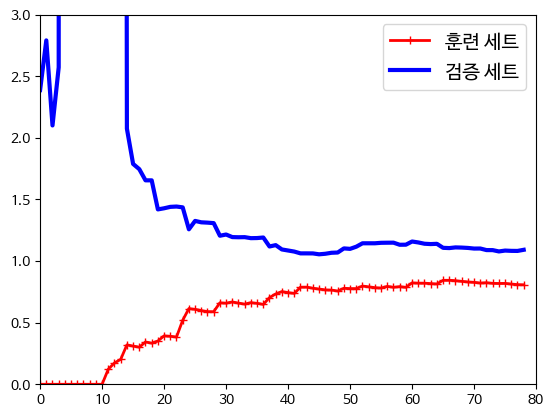

In [30]:
# 책에 없지만 그래프 정상 출력을 위한 코드 추가(그림 4-16, p183)
plot_learning_curves(polynomial_regression, X, y)

plt.axis([0, 80, 0, 3])
plt.show()

이 학습 곡선은 이전 곡선과의 두 가지 중요한 차이가 있다
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

# 4.5 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다. 선형 회귀모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 각기 다른 방법으로 가중치를 제한하는 '릿지'회귀, '라쏘'회귀, 엘라스틱넷을 살펴보자

## 4.5.1 릿지 회귀

- 릿지 회귀는 규제가 추가된 선형 회귀 버전으로, 규제항이 비용함수에 추가된다. 이는 모델의 가중치가 가능한 작게 유지되도록 노력한다.
- 규제항은 훈련하는 동안에만 비용함수에 추가되고 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 사용한다.

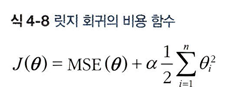

- 하이퍼파라미터 a는 모델을 얼마나 많이 규제할지 조절한다. a=0이면 선형회귀와 같아지고 a가 아주 크면 모든 가중치가 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.

In [31]:
# 정규방정식을 사용한 릿지 회귀를 적용하는 예

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82497007])

In [32]:
# 확률적 경사 하강법을 사용했을 때

sgd_reg = SGDRegressor(penalty = "l2", random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.81978491])

## 4.5.2 라쏘 회귀

- 라쏘 회귀는 선형 회귀의 또 다른 규제 버전이다.

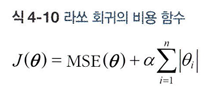

In [33]:
# Lasso 클래스를 사용한 간단한 사이킷런 예제

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)

lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## 4.5.3 엘라스틱넷

- 엘라스틱은 릿지와 라쏘 회귀를 절충한 모델이다. r=0이면 릿지회귀와 같고 r=1이면 라쏘 회귀와 같다.

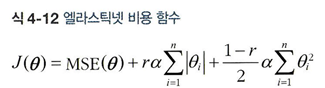

- 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 함
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 **라쏘나 엘라스틱넷**이 낫다. 이 모델들은 **불필요한 특성의 가중치를 0으로** 만들어준다.
- **특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어있는 경우** 라쏘보다는 엘라스틱넷을 선호한다.

In [34]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

## 4.5.4 조기 종료

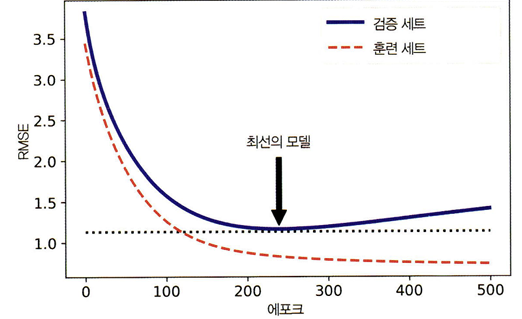

에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측에러와 검증 세트에 대한 예측에러가 줄어든다. 그러나 잠시 후 감소하던 검증 에러가 멈추었다가 다시 상승한다. 이는 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미한다. **조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는** 것이다.

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)


In [36]:
# 조기종료를 위한 기본 구현 코드

from sklearn.base import clone

# 데이터 준비
poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
                        ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start = True 시 fit() 메서드가 호출될 때 이전 모델 파라미터에서 훈련을 이어갑니다.
sgd_reg = SGDRegressor(max_iter = 1, tol = None, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005, random_state = 42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000) :
  sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행 합니다.

  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)

  if val_error < minimum_val_error :
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

# 4.6 로지스틱 회귀

- 로지스틱 회귀는 분류에서도 사용할 수 있다. 추정 확률이 0.5를 넘으면 그 샘플이 해당 클래스에 속한다고 예측하고 아니면 클래스에 속하지 않는다고 예측한다.

## 4.6.1 확률 추정

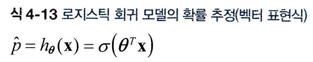

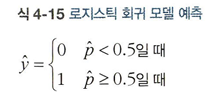

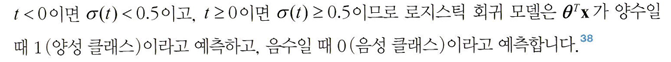

## 4.6.3 결정 경계

- 로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋 사용
- 세 개의 품종 Setosa(0), Versicolor(1), Virginica(2)에 속하는 붓꽃 150개의 꽃잎(petal)과 꽃받침(sepal)의 너비와 길이를 담고 있다.

In [37]:
from sklearn.datasets import load_iris
import pandas as pd

# Iris 데이터 로드
iris = load_iris()

# 데이터프레임으로 변환
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 처음 3개 행 출력
print(df.head(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


In [38]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [39]:
X = iris["data"][:, 3:] # 꽃잎 너비
y = (iris["target"] == 2).astype(int) # iris virginica이면 1 아니면 0

In [40]:
# 로지스틱 모델 훈련

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = "lbfgs", random_state = 42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

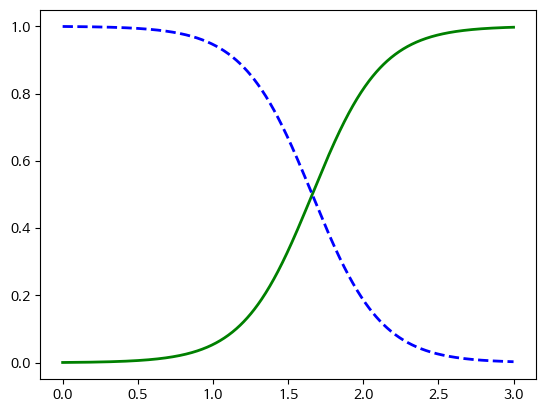

In [43]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-",  linewidth = 2, label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Iris virginica 아님")

=> 양쪽 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어진다. 아래 코드로 확인할 수 있다.

In [44]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀 (다항 로지스틱 회귀)

- 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 sk(x)를 계산하고, 그 점수에 소프트맥수 함수를 적용하여 각 클래스의 확률을 추정한다.

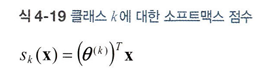

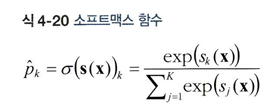

- 로지스틱 회귀분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정확률이 가장 높은 클래스를 선택

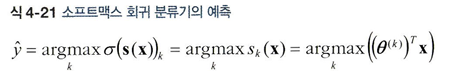

In [45]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10, random_state = 42)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [46]:
softmax_reg.predict([[5, 2]])

array([2])

In [47]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])

=> 94.2%의 확률로 Virginica (클래스 2)라고 출력할 것이다.